# Predicting income
I would like to predict whose income is >$50k by using specific parameters of the dataset

In [76]:
import pandas as pd #"as pd" means that we can use the abbreviation in commands
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_csv('adults/adults.csv')
# df.dropna(how='all')
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Preprocessing
I need to remain the columns because it wouldnt get them otherwise

In [77]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income' ]

translating categorical values to numerical to use them later on

In [78]:
from sklearn.preprocessing import LabelEncoder
#translating categorical values to numerical & convert the value 
number = LabelEncoder()
df['sex'] = number.fit_transform(df['sex'])
df['income'] = number.fit_transform(df['income'])

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,United-States,1


In [79]:
df.corr()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076646,0.036527,0.088832,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.026858,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.012280,0.122630,0.079923,0.148123,0.335154
sex,0.088832,0.026858,0.012280,1.000000,0.048480,0.045567,0.229309,0.215980
capital-gain,0.077674,0.000432,0.122630,0.048480,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,0.045567,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.229309,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.215980,0.223329,0.150526,0.229689,1.000000


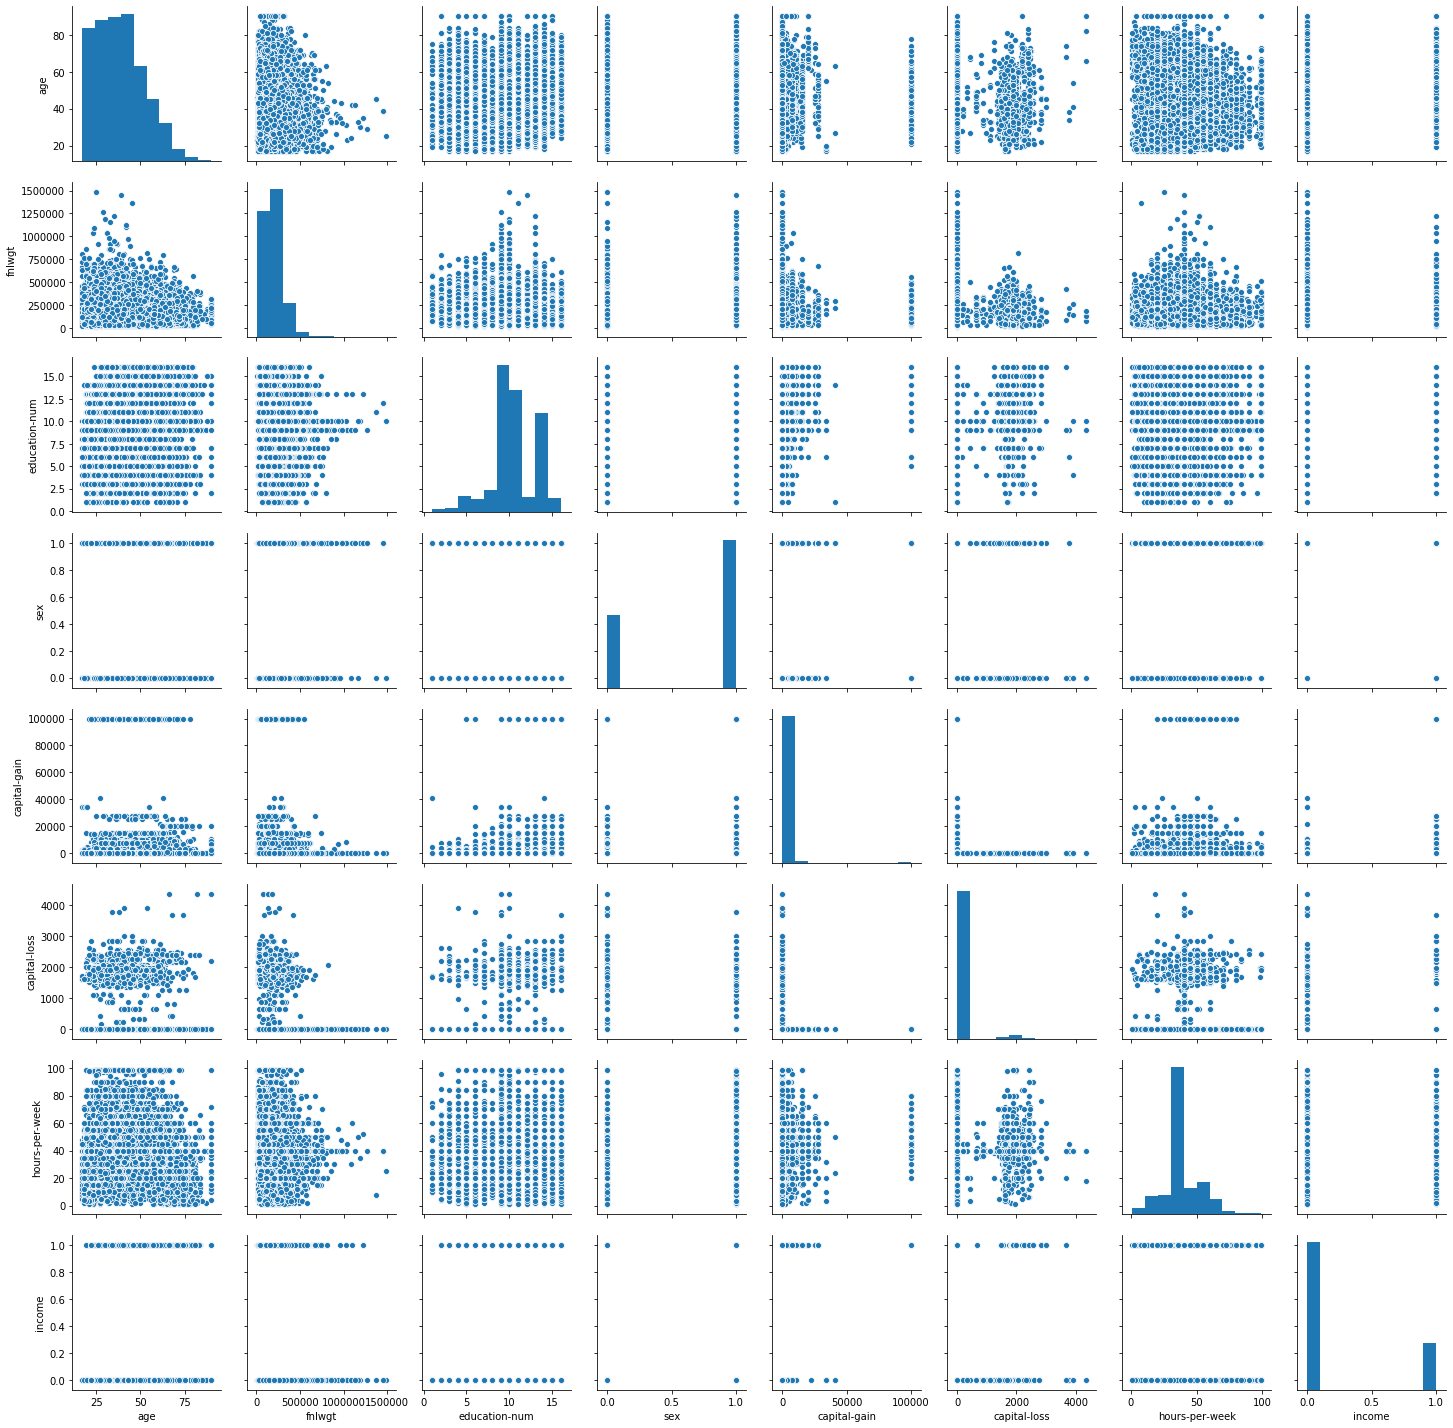

In [80]:
import seaborn as sns #plotting library 
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

sns.pairplot(df)
plt.show()

In [81]:
#import standarddataset from the aif360 of Microsoft
from aif360.datasets import StandardDataset

#standarddataset translates it into a dataset that protects one, or multiple attributes (in this case the sex of the sollicitant)
dataset = StandardDataset(df, label_name='income',
                #the favorable class is the one I am trying to predict (Y value)
                 favorable_classes=[1],
                 protected_attribute_names=['sex'],
                 privileged_classes=[[1]],
                
                 instance_weights_name=None,
                #standard making categorical features  (dummiedata)
                 categorical_features=['workclass', 'education',
                     'marital-status', 'occupation', 'relationship',
                     'native-country'],
                #drop features i wont be needing
                 features_to_keep=[], features_to_drop=['fnlwgt', 'race'],
                 na_values=['?'], custom_preprocessing=None,)

### splitting the datasets train/test

In [82]:
dataset_train, dataset_test = dataset.split([0.7], shuffle=True)

#stating which are unprivileged group and which one is the privileged
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]

### calculate statistical parity
parity is a nice word for 'equality' so I am going to calculate the statistical equality, or rather the differences between the privileged (male) group and the unprivileged (female) group. If the outcome is a negative number it means it is statiscally unequal, disadvantaging the unpriviliged group. 

In [83]:
from aif360.metrics import BinaryLabelDatasetMetric
#BinaryLabelDatasetMetric are metrics to calculate biases on training dataset
metric_train = BinaryLabelDatasetMetric(dataset_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.193074


This means that the privileged group got 19% more positive outcomes than the unprivileged, female group. To mitigate this bias, I will do so by using the reweighing in the pre-processing step. It is in the pre-processing step because it effects the dataset, before the algorithm is used. 

In [112]:
print("num_positives, female , male: ", metric_train.num_positives(False), metric_train.num_positives(True))
print("num_negatives, female , male: ", metric_train.num_negatives(False), metric_train.num_negatives(True))
print("base_rate, female , male: ", metric_train.base_rate(False), metric_train.base_rate(True))
print("disparate impact:", metric_train.disparate_impact())
print("smoothed emperical differential fairness:", metric_train.smoothed_empirical_differential_fairness(concentration=1.0))
print("consistency for both groups:", metric_train.consistency())

num_positives, female , male:  829.0 4647.0
num_negatives, female , male:  6663.0 10653.0
base_rate, female , male:  0.1106513614522157 0.3037254901960784
disparate impact: 0.3643137142713364
smoothed emperical differential fairness: 1.009312675607597
consistency for both groups: [0.8494384]


num_positives are the total number of positives outcomes for both groups, same for the num_negatives. <br>
The baserate is how many actual cases there are of both genders earning >50k. The base rate is higher for male so apparently more males in this dataset earn above 50k. The difference is baserates makes it hard for algorithms to become equal based on false negative, false positive and calibration for both genders. (https://www.lesswrong.com/posts/ouQNu3hhfKLBRuwR7/no-nonsense-version-of-the-racial-algorithm-bias)  <br> 
disparate impact is the probability of favourable outcome for unprivileged group / favourable outcome for priviliged group. this should be 1 to be equal. the lower it is, the priviliged group will have a higher chance of getting the favourable outcome. <br> 
smoothed empirical differntial fairness is the definition of algorithmic fairness according to https://arxiv.org/pdf/1807.08362.pdf, however I do not understand what the number means completely. My best guess is that it is fair when outcomes. are almost the same, (its close to 1) but with the privileged group to have 0.009 more chance of a positive outcom <br> 
consistency means that 85% of the label outcomes are consistent for similair instances

### Reweighing

In [117]:
from aif360.algorithms.preprocessing import Reweighing

RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_new_train = RW.fit_transform(dataset_train)
dataset_new_train

               instance weights features                                    \
                                                       protected attribute   
                                     age education-num                 sex   
instance names                                                               
6051                   1.091150     56.0           9.0                 1.0   
24276                  1.091150     21.0          10.0                 1.0   
6156                   1.091150     20.0          10.0                 1.0   
22159                  1.091150     26.0          13.0                 1.0   
3629                   1.091150     32.0           9.0                 1.0   
...                         ...      ...           ...                 ...   
15328                  1.091150     41.0           9.0                 1.0   
6650                   0.854266     28.0          11.0                 0.0   
19701                  2.171322     23.0          13.0          

In [114]:
dataset_train

               instance weights features                                    \
                                                       protected attribute   
                                     age education-num                 sex   
instance names                                                               
6051                        1.0     56.0           9.0                 1.0   
24276                       1.0     21.0          10.0                 1.0   
6156                        1.0     20.0          10.0                 1.0   
22159                       1.0     26.0          13.0                 1.0   
3629                        1.0     32.0           9.0                 1.0   
...                         ...      ...           ...                 ...   
15328                       1.0     41.0           9.0                 1.0   
6650                        1.0     28.0          11.0                 0.0   
19701                       1.0     23.0          13.0          

In [115]:
#BinaryLabelDatasetMetric are metrics to calculate biases on training dataset
metric_new_train = BinaryLabelDatasetMetric(dataset_new_train, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)

print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_new_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.000000
